In [92]:
import pandas as pd
import seaborn as sns
import os


In [93]:
df = pd.read_excel('Product_Survey_Results.xlsx')
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_colwidth', None)  
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               100 non-null    object
 1   Which age group do you belong to?                                                                                       100 non-null    object
 2   What is your gender?                                                                                                    100 non-null    object
 3   Which category do you currently belong to?                                                                              100 non-null    object
 4   Whi

,Timestamp,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)"
0,2021/09/26 4:11:56 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,2021/10/08 1:03:51 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Very likely,Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,2021/10/08 1:11:45 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality;Size...,Very likely,Wheels,Steering wheel;Centre compartment;Door handles...,500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,2021/10/08 1:16:36 PM GMT+8,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,2021/10/08 1:22:02 PM GMT+8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own"


In [94]:
df=df.drop('Timestamp',1)
df.head()
df.dtypes

Which age group do you belong to?                                                                                         object
What is your gender?                                                                                                      object
Which category do you currently belong to?                                                                                object
                                                                                                                           ...  
Are you interested in designing your own components to personalise your car?                                              object
How much are you willing to pay for the personalised design?                                                              object
Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)    object
Length: 12, dtype: object

In [95]:
df[df.isnull().any(axis=1)]

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)"
8,20-30,Male,"Do not own a car, but planning to purchase in ...",NaN,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Headlights,Steering wheel;Dashboard,over 1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
14,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Functionality;Size,Very likely,NaN,Steering wheel;Centre compartment;Door handles...,0,Only with professional help,0,"No, I would need a designer to model my sketch"
15,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,NaN,Steering wheel;Centre compartment;Dashboard,under 500,No,under 500,"No, I would need a designer to model my sketch"
63,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,NaN,Very likely,Wheels,Dashboard,over 1000,Only with professional help,over 1000,"Yes, I can design on my own"


In [96]:
df.columns = df.columns.str.replace(' ', '')

In [97]:
df=df.rename(columns={
    'Whichagegroupdoyoubelongto?':'age',
    'Whatisyourgender?':'gender',
    'Whichcategorydoyoucurrentlybelongto?':'car_status',
    'Whichofthefollowingbestdescribesyou?':'rs_status',
    'Whichofthesefactorsareimportanttoyouwhendecidingwhichcartopurchase?':'purchase_factors',
    'Howlikelyareyoutooptforcustomisedvehicleiftherewerenoextracharges?':'cust_willingness',
    'Whichofthefollowingexteriorcomponentswouldyouchoosetocustomise(texture,layout,size,etc)?':'cust_comp_ext',
    'Whichofthefollowinginteriorcomponentswouldyouchoosetocustomise(texture,layout,size,etc)?':'cust_comp_int',
    'Howmuchareyouwillingtospendoncarcustomisationifsurchargesareapplicable?':'cust_cost',
    'Areyouinterestedindesigningyourowncomponentstopersonaliseyourcar?':'personalise_interest',
    'Howmuchareyouwillingtopayforthepersonaliseddesign?':'personalise_cost',
    'Doyouhaveany3Ddesignexperiencethatwouldhelpwiththedesignprocess?(e.g.AutoCAD,SolidWorks,Blender,etc)':'personalise_ability'
    
})
df.head()

,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,personalise_cost,personalise_ability
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Very likely,Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality;Size...,Very likely,Wheels,Steering wheel;Centre compartment;Door handles...,500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own"


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   100 non-null    object
 1   gender                100 non-null    object
 2   car_status            100 non-null    object
 3   rs_status             99 non-null     object
 4   purchase_factors      99 non-null     object
 5   cust_willingness      100 non-null    object
 6   cust_comp_ext         98 non-null     object
 7   cust_comp_int         100 non-null    object
 8   cust_cost             100 non-null    object
 9   personalise_interest  100 non-null    object
 10  personalise_cost      100 non-null    object
 11  personalise_ability   100 non-null    object
dtypes: object(12)
memory usage: 9.5+ KB


In [99]:
df['purchase_factors'].isnull().values.any()

True

In [100]:

df.fillna('',inplace=True)
df['purchase_factors'].isnull().values.any()


False

In [101]:
purchase_factors_list = df['purchase_factors'].tolist()

In [102]:
purchase_factors_answers = []
for i in purchase_factors_list:
    x=str(i).split(';')
    for a in x:
        if a not in purchase_factors_answers:
            purchase_factors_answers.append(a)
            
purchase_factors_answers

['Price',
 'Functionality',
 'Size',
 'Customisable options',
 'Aesthetics',
 'Technological features',
 'Brand name',
 'Sustainability/environment considerations',
 '']

In [103]:
cust_comp_ext_list = df['cust_comp_ext'].tolist()
cust_comp_ext_answers = []
for i in cust_comp_ext_list:
    x=str(i).split(';')
    for a in x:
        if a not in cust_comp_ext_answers:
            cust_comp_ext_answers.append(a)
            
cust_comp_ext_answers

['Grilles',
 'Headlights',
 'Side mirrors',
 'Bumpers',
 'Wheels',
 '',
 'Brakes',
 'doors',
 'add body kit and change the exhaust and tune the engine']

In [104]:
cust_comp_int_list = df['cust_comp_int'].tolist()
cust_comp_int_answers = []
for i in cust_comp_int_list:
    x=str(i).split(';')
    for a in x:
        if a not in cust_comp_int_answers:
            cust_comp_int_answers.append(a)
            
cust_comp_int_answers

['Centre compartment',
 'Door handles',
 'Dashboard',
 'Steering wheel',
 'Sun blocker for front passengers',
 'Arm rest, position of gear shifter if applicable',
 'Music Player and sound systems',
 'air vent',
 'Design']

In [105]:
df['purchase_factors'] = df['purchase_factors'].str.split(';')
df['cust_comp_ext'] = df['cust_comp_ext'].str.split(';')
df['cust_comp_int'] = df['cust_comp_int'].str.split(';')

In [106]:
df.head()

,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,personalise_cost,personalise_ability
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Customisable opti...",Very likely,[Grilles],[Centre compartment],100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Fu...",Very likely,"[Headlights, Side mirrors, Bumpers]","[Centre compartment, Door handles, Dashboard]",500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[Wheels],"[Steering wheel, Centre compartment, Door hand...",500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Grilles, Headlights, Side mirrors]",[Centre compartment],under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Aesthetics, Functionality, Customisable options]",Very likely,"[Wheels, Grilles, Headlights, Side mirrors]","[Steering wheel, Dashboard]",500-1000,Yes,500-1000,"Yes, I can design on my own"


In [107]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', None)
df = df.join(df.purchase_factors.str.join('|').str.get_dummies())


In [108]:
df=df.join(df.cust_comp_ext.str.join('|').str.get_dummies())


In [109]:
df=df.join(df.cust_comp_int.str.join('|').str.get_dummies())

In [110]:
df.head()

,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,personalise_cost,personalise_ability,Aesthetics,Brand name,Customisable options,Functionality,Price,Size,Sustainability/environment considerations,Technological features,Brakes,Bumpers,Grilles,Headlights,Side mirrors,Wheels,add body kit and change the exhaust and tune the engine,doors,"Arm rest, position of gear shifter if applicable",Centre compartment,Dashboard,Design,Door handles,Music Player and sound systems,Steering wheel,Sun blocker for front passengers,air vent
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Customisable opti...",Very likely,[Grilles],[Centre compartment],100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Fu...",Very likely,"[Headlights, Side mirrors, Bumpers]","[Centre compartment, Door handles, Dashboard]",500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch",1,0,1,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[Wheels],"[Steering wheel, Centre compartment, Door hand...",500-1000,Yes,500-1000,"No, I would need a designer to model my sketch",1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Grilles, Headlights, Side mirrors]",[Centre compartment],under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Aesthetics, Functionality, Customisable options]",Very likely,"[Wheels, Grilles, Headlights, Side mirrors]","[Steering wheel, Dashboard]",500-1000,Yes,500-1000,"Yes, I can design on my own",1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0


In [111]:
for i in df.columns:
    if i in cust_comp_ext_answers:
                df = df.rename(columns={i:'cust_comp_ext_'+ i})

In [112]:
for i in df.columns:
    if i in cust_comp_int_answers:
        print(i)
        df = df.rename(columns={i:'cust_comp_int_'+ i})

Arm rest, position of gear shifter if applicable
Centre compartment
Dashboard
Design
Door handles
Music Player and sound systems
Steering wheel
Sun blocker for front passengers
air vent


In [113]:
for i in df.columns:
    if i in purchase_factors_answers:
        print(i)
        df = df.rename(columns={i:'purchase_factors_'+ i})

Aesthetics
Brand name
Customisable options
Functionality
Price
Size
Sustainability/environment considerations
Technological features


In [114]:
df['car_status'] = df['car_status'].astype('category')
df['age'] = df['age'].astype('category')
df['gender'] = df['gender'].astype('category')
df['rs_status'] = df['rs_status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   age                                                                    100 non-null    category
 1   gender                                                                 100 non-null    category
 2   car_status                                                             100 non-null    category
 3   rs_status                                                              100 non-null    category
 4   purchase_factors                                                       100 non-null    object  
 5   cust_willingness                                                       100 non-null    object  
 6   cust_comp_ext                                                          100 non-null

In [115]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

age
gender
car_status
rs_status
purchase_factors
cust_willingness
cust_comp_ext
cust_comp_int
cust_cost
personalise_interest
personalise_cost
personalise_ability
purchase_factors_Aesthetics
purchase_factors_Brand name
purchase_factors_Customisable options
purchase_factors_Functionality
purchase_factors_Price
purchase_factors_Size
purchase_factors_Sustainability/environment considerations
purchase_factors_Technological features
cust_comp_ext_Brakes
cust_comp_ext_Bumpers
cust_comp_ext_Grilles
cust_comp_ext_Headlights
cust_comp_ext_Side mirrors
cust_comp_ext_Wheels
cust_comp_ext_add body kit and change the exhaust and tune the engine
cust_comp_ext_doors
cust_comp_int_Arm rest, position of gear shifter if applicable
cust_comp_int_Centre compartment
cust_comp_int_Dashboard
cust_comp_int_Design
cust_comp_int_Door handles
cust_comp_int_Music Player and sound systems
cust_comp_int_Steering wheel
cust_comp_int_Sun blocker for front passengers
cust_comp_int_air vent


<AxesSubplot:xlabel='age', ylabel='Count'>

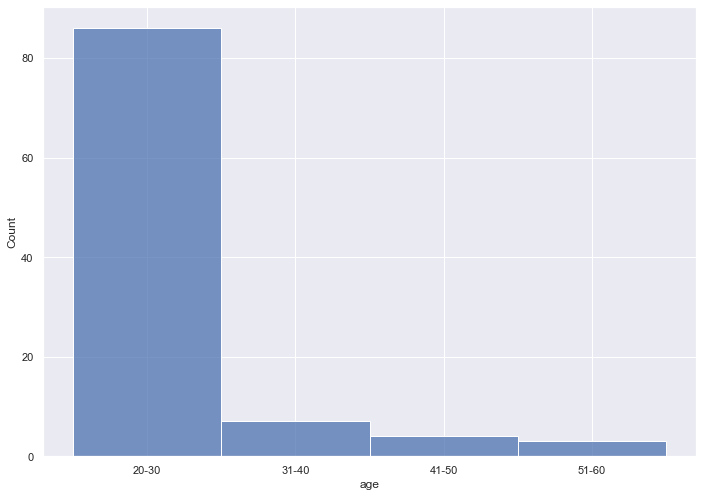

In [116]:
for col in df.columns:
    print(col)

sns.histplot(data=df, x="age")



<AxesSubplot:xlabel='gender', ylabel='Count'>

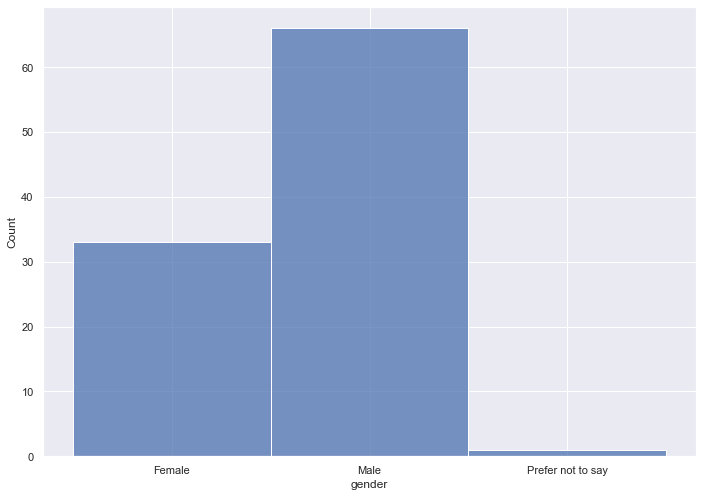

In [117]:
sns.histplot(data=df, x="gender")



<AxesSubplot:xlabel='car_status', ylabel='Count'>

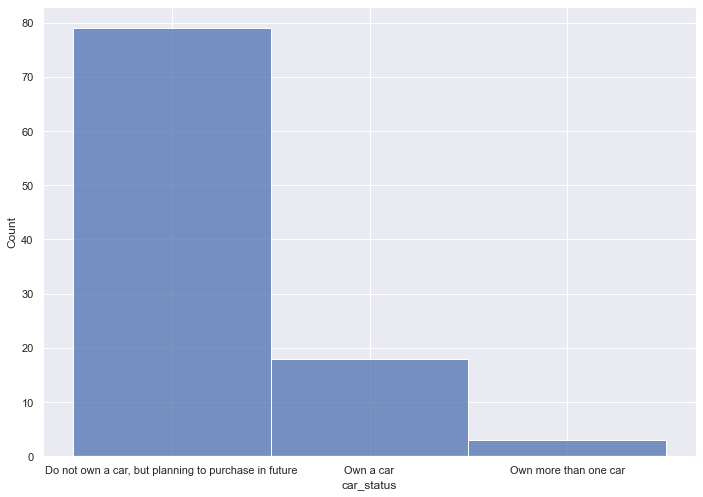

In [118]:
sns.histplot(data=df, x="car_status")


<AxesSubplot:xlabel='rs_status', ylabel='Count'>

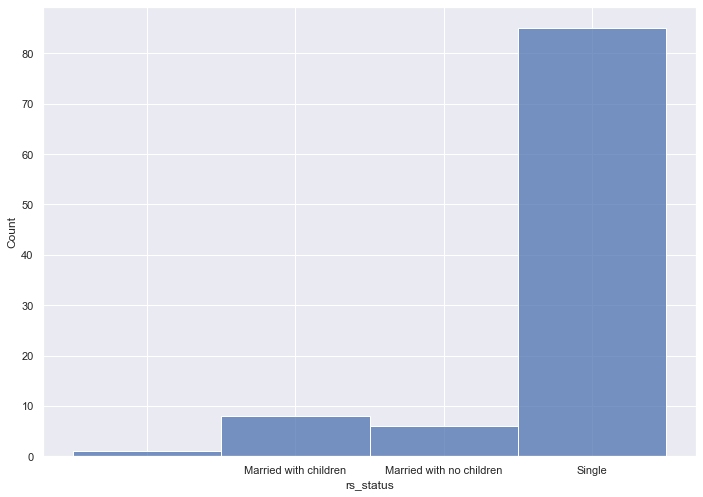

In [119]:
sns.histplot(data=df, x="rs_status")


<AxesSubplot:xlabel='cust_willingness', ylabel='Count'>

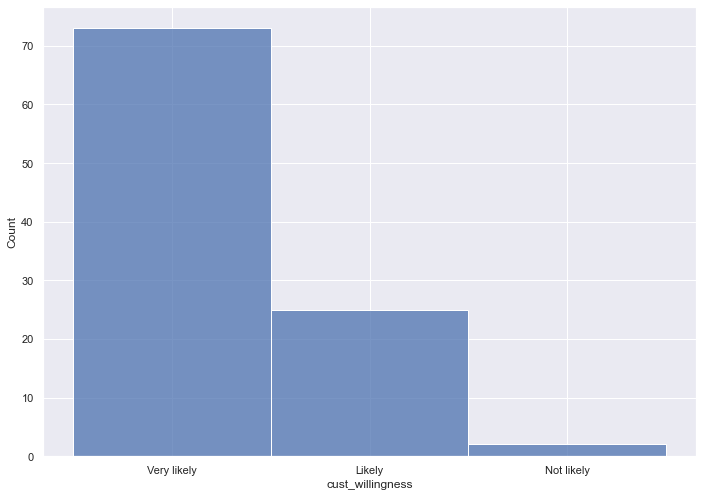

In [120]:
sns.histplot(data=df, x="cust_willingness")


<AxesSubplot:xlabel='personalise_interest', ylabel='Count'>

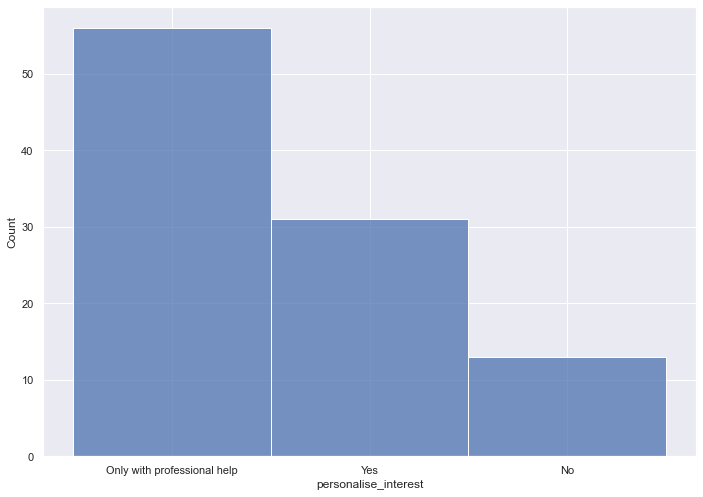

In [121]:
sns.histplot(data=df, x="personalise_interest")


<AxesSubplot:xlabel='personalise_ability', ylabel='Count'>

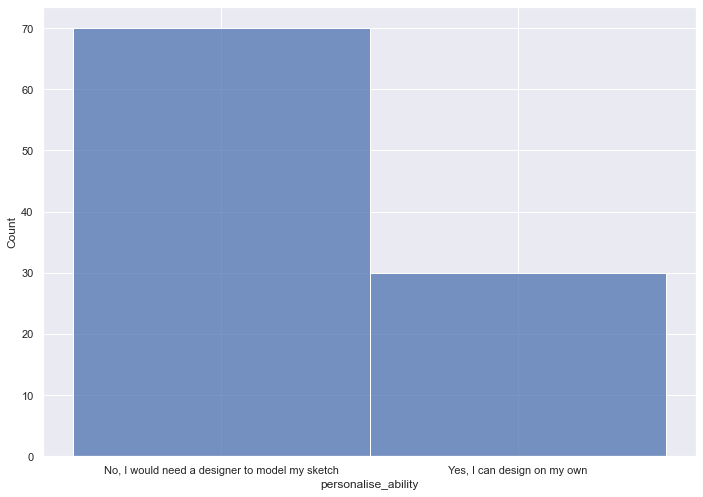

In [122]:
sns.histplot(data=df, x="personalise_ability")

In [123]:
df.head()



,age,gender,car_status,rs_status,purchase_factors,cust_willingness,cust_comp_ext,cust_comp_int,cust_cost,personalise_interest,personalise_cost,personalise_ability,purchase_factors_Aesthetics,purchase_factors_Brand name,purchase_factors_Customisable options,purchase_factors_Functionality,purchase_factors_Price,purchase_factors_Size,purchase_factors_Sustainability/environment considerations,purchase_factors_Technological features,cust_comp_ext_Brakes,cust_comp_ext_Bumpers,cust_comp_ext_Grilles,cust_comp_ext_Headlights,cust_comp_ext_Side mirrors,cust_comp_ext_Wheels,cust_comp_ext_add body kit and change the exhaust and tune the engine,cust_comp_ext_doors,"cust_comp_int_Arm rest, position of gear shifter if applicable",cust_comp_int_Centre compartment,cust_comp_int_Dashboard,cust_comp_int_Design,cust_comp_int_Door handles,cust_comp_int_Music Player and sound systems,cust_comp_int_Steering wheel,cust_comp_int_Sun blocker for front passengers,cust_comp_int_air vent
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Customisable opti...",Very likely,[Grilles],[Centre compartment],100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Fu...",Very likely,"[Headlights, Side mirrors, Bumpers]","[Centre compartment, Door handles, Dashboard]",500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch",1,0,1,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[Wheels],"[Steering wheel, Centre compartment, Door hand...",500-1000,Yes,500-1000,"No, I would need a designer to model my sketch",1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Grilles, Headlights, Side mirrors]",[Centre compartment],under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Aesthetics, Functionality, Customisable options]",Very likely,"[Wheels, Grilles, Headlights, Side mirrors]","[Steering wheel, Dashboard]",500-1000,Yes,500-1000,"Yes, I can design on my own",1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0


DATA CLEANING:
1) CONVERT TO ORDINAL cust_willingness + CUST_COST
2) IDENTIFY OUTLIERS FOR DATASET


DATA CLUSTERING:
1)GROUP BY gender, rs_status, car_status, age

ALGOS:
1)APRIORI FIND RELATIONSHIPS BETWEEN X AND Y
2)RANDOMFOREST / DECISION TREES

DATA VISUALISATIONS:
BAR CHARTS
LINE CHARTS
BOX PLOT
VIOLIN PLOT
SCATTER PLOTS


REPORT:
ABSTRACT
INTRO
DATA CLEANING
METHOLOGIES
EXPLORATORY DATA ANALYSIS
FINDINGS(ALGO): PRICING LINKS FROM A MARKETING ANGLE
CONCLUSION

NEXT MEETING TUESDAY 4PM


